In [1]:
 !pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 4.7 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=f1f2eb8d5c9c4154db99792ab29943b0eb1ba435e905522795ac0f3cec270621
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control


In [2]:
from sympy import Expr, symbols, solve
import math
import numpy as np
import control as ctl

##Parametros de Entrada:

In [3]:
e = symbols('e')
mp = 0.3
tss = 40

In [4]:
L0 = 15
a1 = 0.178;
A1 = 15.518;
Km = 4.6;
g = 981;

##Linearização

In [13]:
PolosExpr = (-(0.5) * (a1) * ((2)**0.5) * g ) / ((A1) * ((g*L0)**0.5))
PolosExpr

-0.06559309614842768

##Calculos de Parametros para o Controlador

In [6]:
per = math.log(mp)**2
expr = (e**2)*(per + math.pi**2) + per

Qsi = solve(expr)[0]
Qsi = 0.357857130503317

print("Qsi    = ",Qsi)
Beta = math.degrees(math.acos(Qsi))
pass
print("Beta   = ",Beta)
Wn = 4/(Qsi*tss)

print("Wn     = ",Wn)
ponto0 = np.array([-Qsi*Wn,+(Wn*math.sqrt(1-Qsi**2))])

print("Ponto0 = ",ponto0)
ponto1 = np.array([-Qsi*Wn,-(Wn*math.sqrt(1-Qsi**2))])

print("Ponto1 = ",ponto1)

Qsi    =  0.357857130503317
Beta   =  69.03134674082568
Wn     =  0.27944112741124516
Ponto0 =  [-0.1         0.26093552]
Ponto1 =  [-0.1        -0.26093552]


##Criterio de Angulo

In [7]:
#https://www.geogebra.org/calculator/agmcjky5

P0 = np.array([ 0,0])
P1 = np.array([PolosExpr,0])
P2 = np.array([PolosExpr,0])


TETA0 = 180 + math.degrees(math.atan( (ponto0[1]-P0[1]) / (ponto0[0]-P0[0]) ))
TETA1 = 180 + math.degrees(math.atan( (ponto0[1]-P1[1]) / (ponto0[0]-P1[0]) ))

Fi = (TETA0 + 2*TETA1 - 180)/2

Z1 = np.array([((-ponto0[1])/math.tan((Fi*math.pi/180)))+ponto0[0],0])
print("Fi=", Fi)
print("Z1=", Z1)

Fi= 62.996001263255835
Z1= [-0.23297623  0.        ]


##Criterio de Modulo


In [8]:
Kc = (np.linalg.norm(ponto0 - P0)) * (np.linalg.norm(ponto0 - P1)) / (np.linalg.norm(ponto0 - Z1))/0.0194
Kc

12.944853123580268

##Obtenção do PID

In [9]:
s = ctl.TransferFunction.s
kp = 6.03129;
kd = 12.944/kp;
ki = 0.702573/kp;

C_s = (kp*(1 + (ki/s) + kd*s))

print('Kp= ',kp);
print('Kd= ',kd);
print('Ki= ',ki);
print('');

print('C_s= ',C_s);

Kp=  6.03129
Kd=  2.146141206939146
Ki=  0.11648801500176578

C_s=  
12.94 s^2 + 6.031 s + 0.7026
----------------------------
             s



##Zigle Nicholes e CHR

In [10]:
gain = 8.150
t1 = gain * 0.283 
t2 = gain * 0.632

tau = 25.176
teta = 6.824

k = gain/2
print("K:"+str(k)+"; teta:"+str(teta)+"; tau: "+str(tau))

K:4.075; teta:6.824; tau: 25.176


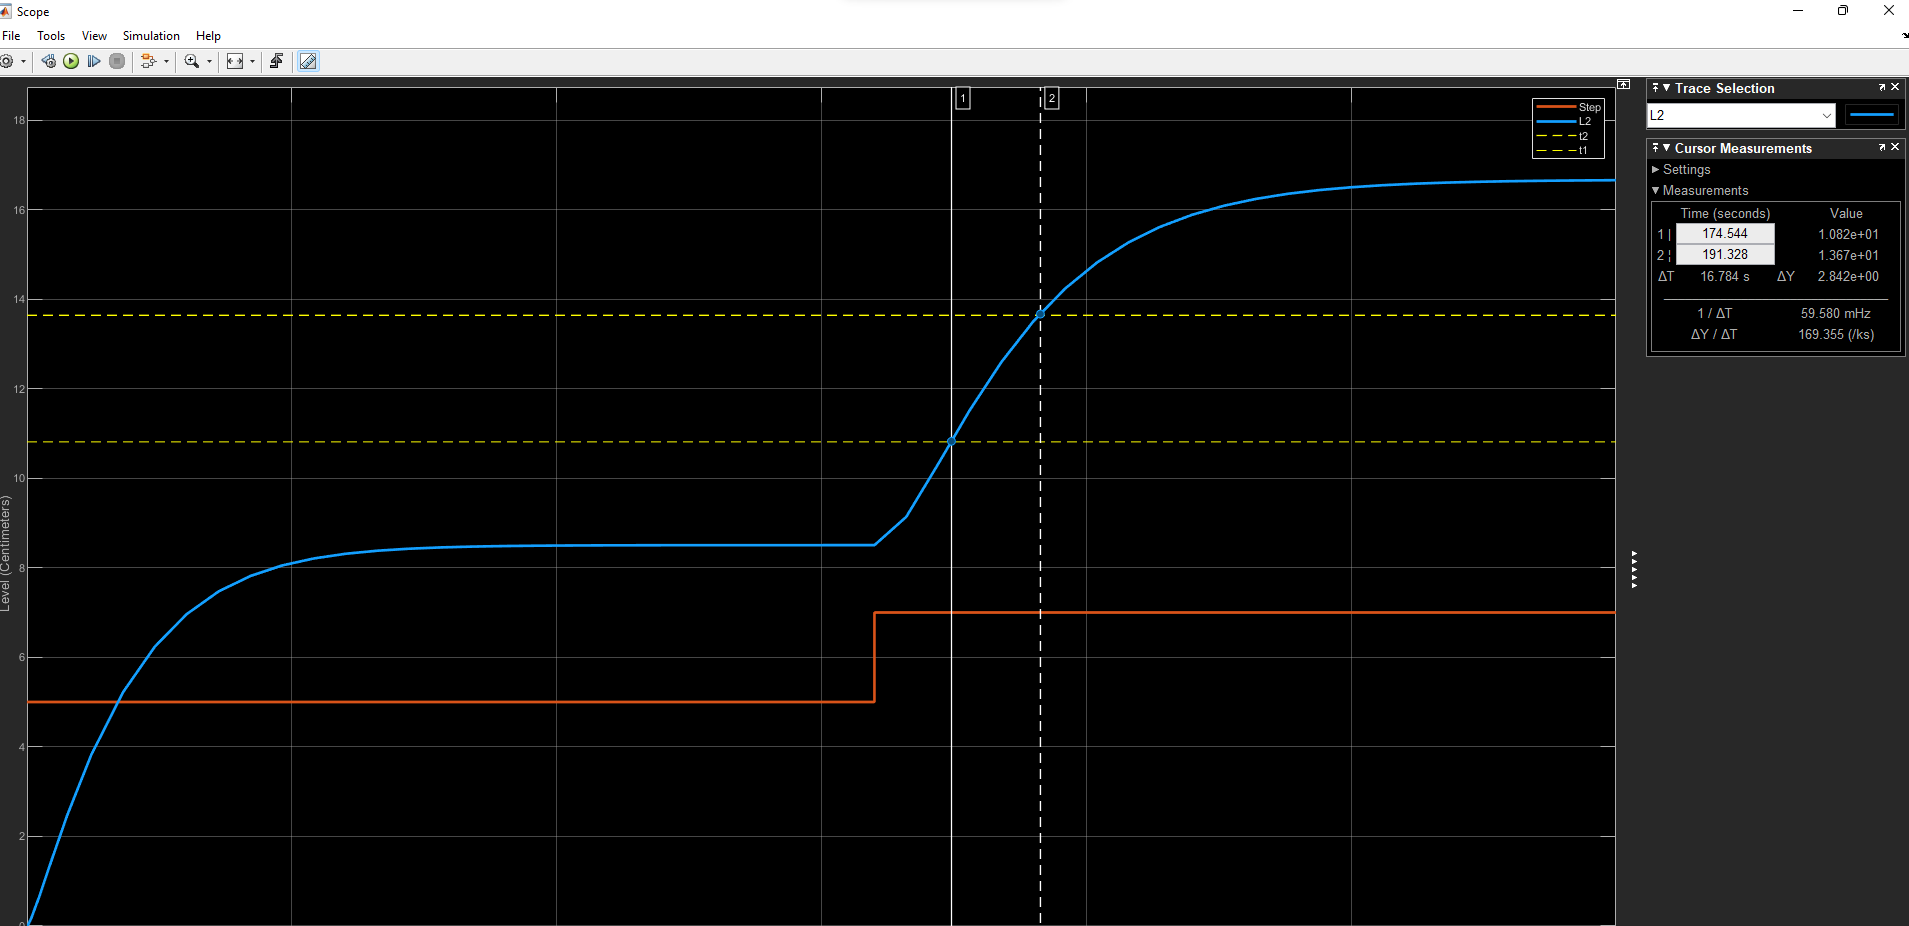

##CHR Modelo Servo

In [11]:
PKP   = ((0.3*tau)/(k*teta)) 
PIKP  = ((0.35*tau)/(k*teta))
PIDKP = ((0.6*tau)/(k*teta))
 
PITI  = (tau*1.16)
PIDTI = tau

PIDTD = (teta/2)


print("P_KP: "  ,  PKP)
print()
print("PI_TI: " , PITI)
print("PI_KP: " , PIKP)
print()
print("PID_KP: ", PIDKP)
print("PID_TI: ", PIDTI)
print("PID_TD: ", PIDTD)
print()
print("PID_KP: ", PIDKP)
print("PID_KI: ", PIDKP/PIDTI)
print("PID_KD: ", PIDTD*PIDKP)

P_KP:  0.2716072468875639

PI_TI:  29.204159999999995
PI_KP:  0.3168751213688245

PID_KP:  0.5432144937751278
PID_TI:  25.176
PID_TD:  3.412

PID_KP:  0.5432144937751278
PID_KI:  0.021576679924337774
PID_KD:  1.8534478527607359


##CHR Modelo Regulador

In [12]:
PKP   = ((0.7*tau)/(k*teta)) 
PIKP  = ((0.6*tau)/(k*teta))
PIDKP = ((0.95*tau)/(k*teta))
 
PITI  = tau

PIDTI = (tau*1.357)

PIDTD = (teta*0.473)


print("P_KP: "  ,  PKP)
print()
print("PI_TI: " , PITI)
print("PI_KP: " , PIKP)
print()
print("PID_KP: ", PIDKP)
print("PID_TI: ", PIDTI)
print("PID_TD: ", PIDTD)
print()
print("PID_KP: ", PIDKP)
print("PID_KI: ", PIDKP/PIDTI)
print("PID_KD: ", PIDTD*PIDKP)

P_KP:  0.633750242737649

PI_TI:  25.176
PI_KP:  0.5432144937751278

PID_KP:  0.8600896151439523
PID_TI:  34.163832
PID_TD:  3.2277519999999997

PID_KP:  0.8600896151439523
PID_KI:  0.025175443291723023
PID_KD:  2.776155975460122
